In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('Book1.csv', sep=';', skiprows=2)

df['HOURLY RATE'] = df['HOURLY RATE'].str.replace('$', '', regex=False).str.replace(',', '.').astype(float)
df['GROSS PAY'] = df['GROSS PAY'].str.replace('$', '', regex=False).str.replace(' ', '').str.replace(',', '.').astype(float)
df['HRS'] = df['HRS'].str.replace(',', '.').astype(float)

print("Data loaded and cleaned successfully")
print(f"Total records: {len(df)}")

Data loaded and cleaned successfully
Total records: 94


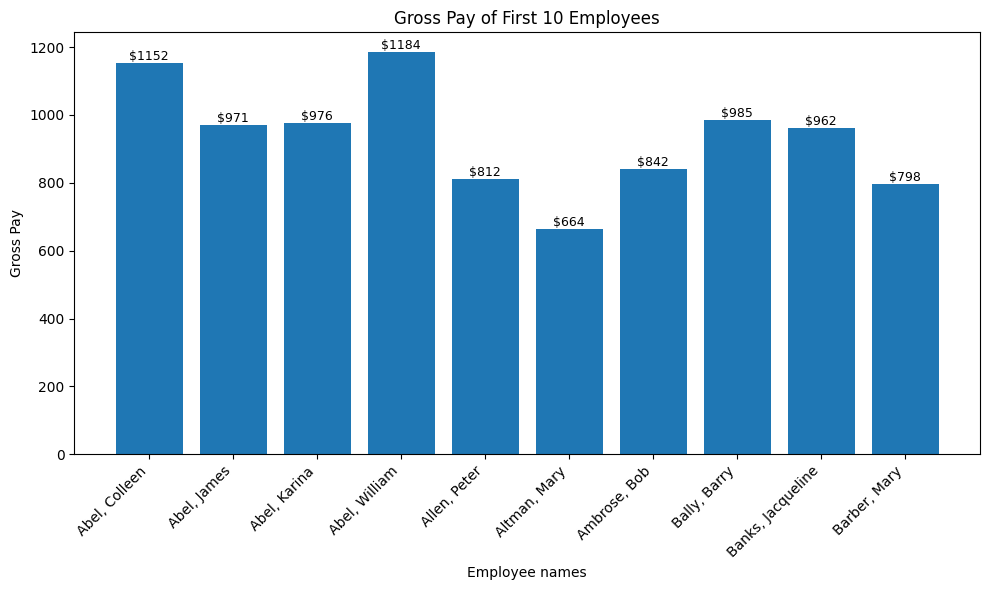

In [24]:
# Image 1: First 10 employees with gross pay
first_10 = df.head(10)
gross_pay = first_10['GROSS PAY'].values

plt.figure(figsize=(10, 6))
plt.bar(first_10['Employee'], gross_pay)

for i, v in enumerate(gross_pay):
    plt.text(i, v, f'${v:.0f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Employee names')
plt.ylabel('Gross Pay')
plt.title('Gross Pay of First 10 Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('payroll_analysis_1.png', dpi=300, bbox_inches='tight')
plt.show()

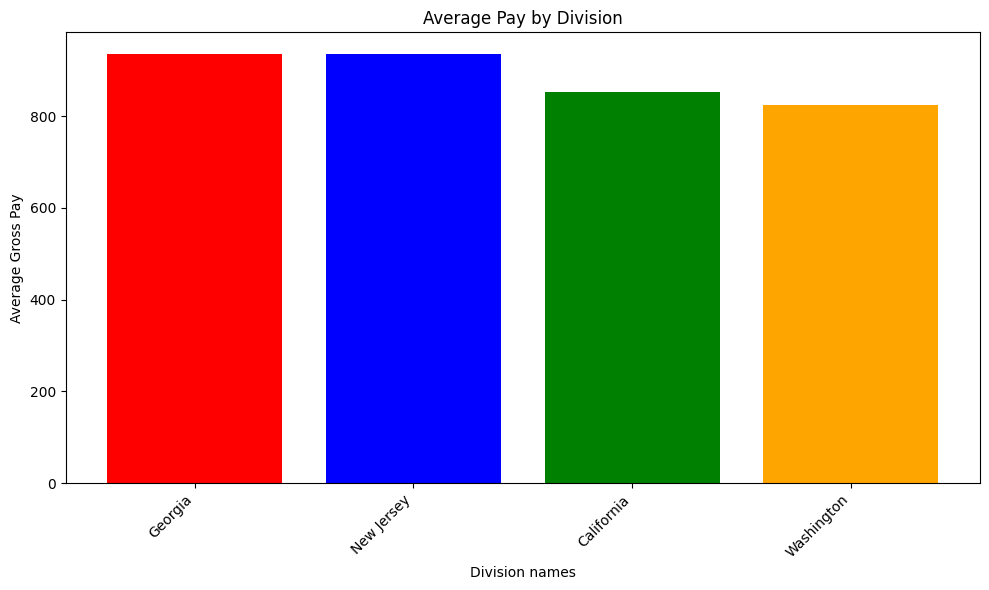

In [25]:
# Image 2: Average pay by division
avg_pay = df.groupby('DIVISION')['GROSS PAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_pay.index, avg_pay.values, color=['red', 'blue', 'green', 'orange'])

plt.xlabel('Division names')
plt.ylabel('Average Gross Pay')
plt.title('Average Pay by Division')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('payroll_analysis_2.png', dpi=300, bbox_inches='tight')
plt.show()

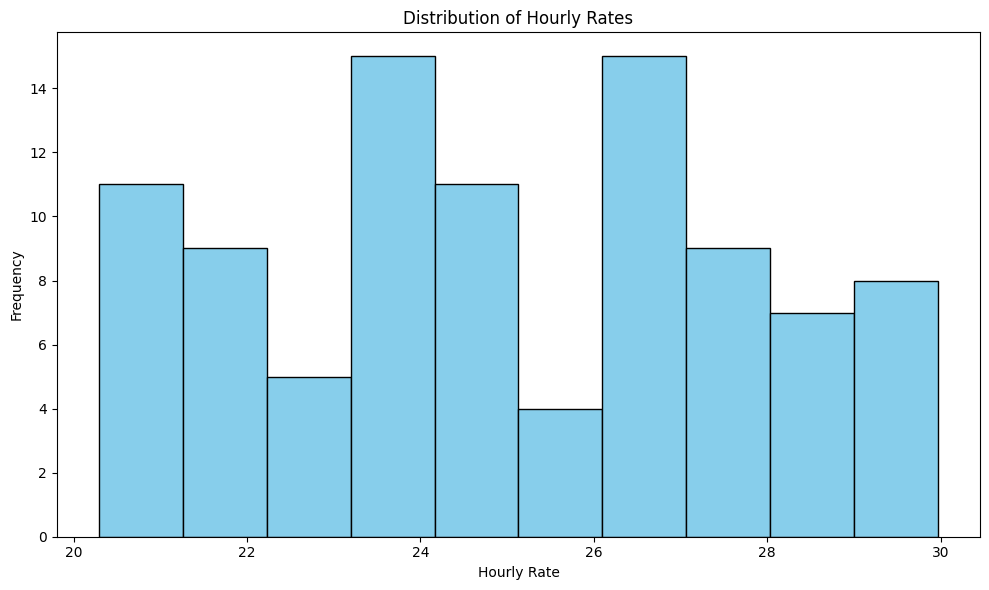

In [26]:
# Image 3: Distribution of hourly rates
plt.figure(figsize=(10, 6))
plt.hist(df['HOURLY RATE'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Hourly Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Hourly Rates')
plt.tight_layout()
plt.savefig('payroll_analysis_3.png', dpi=300, bbox_inches='tight')
plt.show()

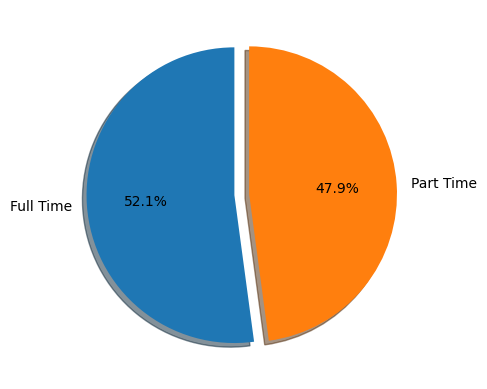

In [27]:
status_counts = df['STATUS'].value_counts()

explode = ((status_counts == status_counts.max()).astype(float) * 0.1).tolist()

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
plt.show()